In [3]:
import torch # PyTorch Library
import numpy # NumPy
from sklearn.datasets import make_blobs # 사이킷런 라이브러리 / 데이터 생성용
import matplotlib.pyplot as plt # 데이터 시각화 용도 라이브러리
import torch.nn.functional as F

In [42]:
n_dim = 2
x_train, y_train = make_blobs(n_samples = 80,
                             n_features = 2,
                             centers=[[1,1], [-1,-1], [1, -1], [-1, 1]],
                             shuffle=True,
                             cluster_std=0.3)
x_test, y_test = make_blobs(n_samples = 20,
                             n_features = 2,
                             centers=[[1,1], [-1,-1], [1, -1], [-1, 1]],
                             shuffle=True,
                             cluster_std=0.3)

In [43]:
# XOR 문제로 치환하기 위해 (1,1), (-1,-1) => 0, (1,-1), (-1,1) => 1로 레이블을 바꾼다.
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

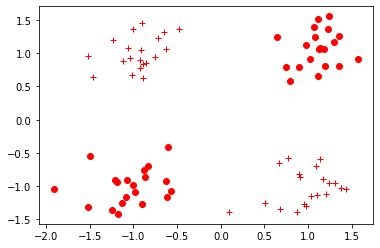

In [45]:
# 데이터 시각화 함수
def vis_data(x, y = None, c='r'):
    for x_, y_ in zip(x,y):
        plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
        
plt.figure()
vis_data(x_train, y_train)
plt.show()

In [50]:
# Numpy 배열을 pytorch의 Tensor로 변환한다.
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

y_train

tensor([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 0., 0., 0., 1., 1.])

In [63]:
# Module class 상송
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        
        self.input_size = input_size
        self.hidden_Size = hidden_size
        
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        fc1 = self.fc1(x)
        relu = self.relu(fc1)
        fc2 = self.fc2(relu)
        output = self.sigmoid(fc2)
        return output
    
    def _debug(self, x):
        fc1 = self.fc1(x)
        print("fc1:", fc1)
        
        relu = self.relu(fc1)
        print("relu:", relu)
        
        fc2 = self.fc2(relu)
        print("fc2:", fc2)
        
        output = self.sigmoid(fc2)
        print("sigmoid:", output)
        return output
    
net = Net(2, 5)
print("---- net의 모델 모형을 출력한다.")
print(net)
print("----")
net._debug(x_test)

---- net의 모델 모형을 출력한다.
Net(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
----
fc1: tensor([[ 0.6926,  0.1023, -0.0940,  0.8105,  0.4915],
        [ 0.8480, -0.0397, -0.1183,  0.8643,  0.4215],
        [-0.4636,  1.0518, -0.0065,  0.3952,  0.9094],
        [-0.8364, -0.0581, -1.2075,  0.0590, -0.3144],
        [-0.1433, -0.9971, -1.5811,  0.2550, -0.9198],
        [ 0.7930,  0.2056,  0.0596,  0.8731,  0.6334],
        [-0.6882, -0.2136, -1.2482,  0.1073, -0.4005],
        [ 0.3003, -0.8653, -1.1841,  0.4852, -0.6042],
        [ 1.0841, -0.1510, -0.0646,  0.9608,  0.4153],
        [ 0.8343,  0.2381,  0.1141,  0.8974,  0.6821],
        [-0.3564,  0.7851, -0.1697,  0.4082,  0.6993],
        [-0.3211,  0.9501, -0.0040,  0.4486,  0.8727],
        [ 0.0338, -1.0086, -1.4782,  0.3378, -0.8553],
        [-0.0524,  1.4416,  0.5939,  0.6469,  1.4588],
        [ 0.0369, -0.8406, -1.3304

tensor([[0.4639],
        [0.4831],
        [0.3201],
        [0.4468],
        [0.4558],
        [0.4474],
        [0.4491],
        [0.4720],
        [0.4922],
        [0.4399],
        [0.3540],
        [0.3333],
        [0.4602],
        [0.2418],
        [0.4615],
        [0.4350],
        [0.4448],
        [0.4399],
        [0.2271],
        [0.4658]], grad_fn=<SigmoidBackward>)

In [77]:
# Model 생성
model = Net(2,5)

# 학습율
lr = 0.03

# Binary Cross Entropy
criterion = torch.nn.BCELoss()

# Epochs
epochs = 2000

# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [82]:
# 모델을 학습하기 전 loss를 출력한다.
# tensor.item() : 텐서의 값을 스칼라 값으로 출력한다. 여러 차원의 데이터인 경우엔 에러가 나온다.
# 즉, 텐서의 차원이 1x1인 경우에만 사용할 수 있음
model.eval()
test_loss_before = criterion(model(x_test).view(-1), y_test)
print("test_loss before training", test_loss_before.item())

test_loss before training 0.7115614414215088


In [90]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    output = model(x_train)
    loss = criterion(output.view(-1), y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0 :
        print("epoch at: {}, train loss: {}".format(epoch, loss.item()))

epoch at: 0, train loss: 0.005957100074738264
epoch at: 100, train loss: 0.00581338070333004
epoch at: 200, train loss: 0.005675789900124073
epoch at: 300, train loss: 0.005543788429349661
epoch at: 400, train loss: 0.005417115055024624
epoch at: 500, train loss: 0.005295421462506056
epoch at: 600, train loss: 0.005178480409085751
epoch at: 700, train loss: 0.005065985955297947
epoch at: 800, train loss: 0.004957740195095539
epoch at: 900, train loss: 0.004853499121963978
epoch at: 1000, train loss: 0.004753074608743191
epoch at: 1100, train loss: 0.004656275734305382
epoch at: 1200, train loss: 0.004562884569168091
epoch at: 1300, train loss: 0.004472752101719379
epoch at: 1400, train loss: 0.0043857344426214695
epoch at: 1500, train loss: 0.004301665350794792
epoch at: 1600, train loss: 0.004220394883304834
epoch at: 1700, train loss: 0.004141796380281448
epoch at: 1800, train loss: 0.0040657734498381615
epoch at: 1900, train loss: 0.0039921910502016544


In [93]:
# 학습 후의 가중치를 출력한다.
test_loss_before = criterion(model(x_test).view(-1), y_test)
print("test_loss after training", test_loss_before.item())

test_loss after training 0.003266087966039777


In [95]:
# 학습 결과를 파일로 저장한다.
torch.save(model.state_dict(), './simple_ann_model.pt')
print('state_dict: {}'.format(model.state_dict()))

state_dict: OrderedDict([('fc1.weight', tensor([[-1.7294,  2.1685],
        [-2.3416, -1.1150],
        [ 1.6662, -0.9213],
        [ 1.2619,  1.3879],
        [ 1.7680,  1.8662]])), ('fc1.bias', tensor([-0.1526, -0.0158,  0.7883, -0.0984, -0.2078])), ('fc2.weight', tensor([[ 2.6387, -2.5046,  2.0151, -1.6347, -2.4659]])), ('fc2.bias', tensor([1.1443]))])


In [102]:
# 저장한 학습 결과를 가져온다.
new_model = Net(2,5)
new_model.load_state_dict(torch.load('./simple_ann_model.pt'))

print("(-1,1) = ", new_model(torch.Tensor([-1, 1])).item())
print("(1,-1) = ", new_model(torch.Tensor([1, -1])).item())
print("(1,1) = ", new_model(torch.Tensor([1, 1])).item())
print("(-1,-1) = ", new_model(torch.Tensor([-1, -1])).item())

(-1,1) =  0.9996472597122192
(1,-1) =  0.9996463060379028
(1,1) =  0.00048533553490415215
(0,0) =  0.0006193481967784464
